# Descriptive Analytics

*Load and Prepare data*

In [3]:
import pandas as pd

# Load datasets
energy_df = pd.read_csv('energy.csv')
temperature_df = pd.read_csv('temperature.csv')

# Drop irrelevant columns if needed
if 'Unnamed: 13' in temperature_df.columns:
    temperature_df = temperature_df.drop(columns=['Unnamed: 13', 'Unnamed: 14'])

# Melt to long format
energy_long = energy_df.melt(id_vars='State', var_name='Month', value_name='Energy_Consumption')
temperature_long = temperature_df.melt(id_vars='State', var_name='Month', value_name='Temperature')

# Merge on State + Month
merged_df = pd.merge(energy_long, temperature_long, on=['State', 'Month'])

# Check merged data
merged_df.head()


,State,Month,Energy_Consumption,Temperature
0,Alaska,Jan-24,228,25
1,Arizona,Jan-24,2748,73
2,California,Jan-24,7549,77
3,Connecticut,Jan-24,1276,55
4,Florida,Jan-24,10196,87


**basic statistics**

In [4]:
# Describe statistics
print(merged_df[['Temperature', 'Energy_Consumption']].describe())


       Temperature  Energy_Consumption
count    300.00000          300.000000
mean      79.55000         8145.830000
std       18.81651        24385.335937
min        0.00000          140.000000
25%       71.00000         1088.000000
50%       84.00000         2454.500000
75%       92.00000         4377.000000
max      114.00000       165592.000000


**scatter plt**

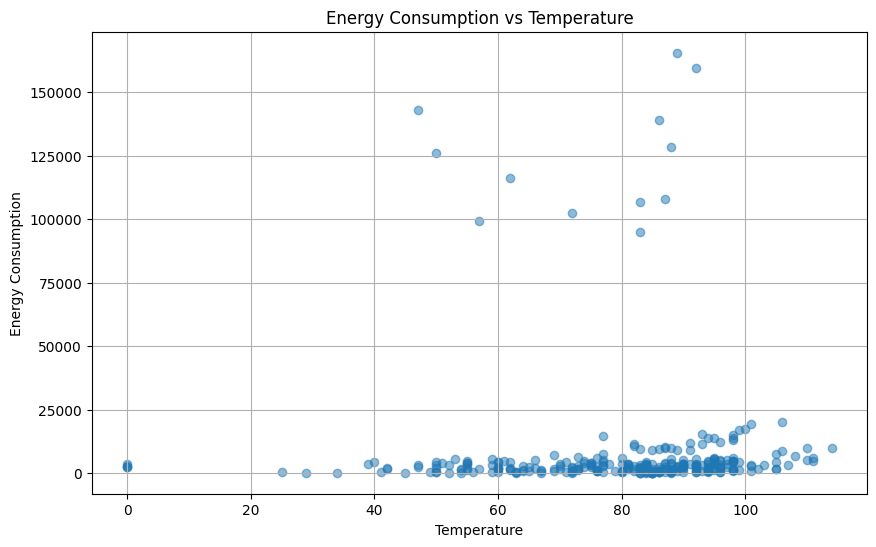

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) # Plot size
plt.scatter(merged_df['Temperature'], merged_df['Energy_Consumption'], alpha=0.5) # Transparency for better visibility
plt.title('Energy Consumption vs Temperature') #
plt.xlabel('Temperature') #
plt.ylabel('Energy Consumption') #
plt.grid(True) # Show grid lines
plt.show() # Display the plot
# Save the merged DataFrame to a CSV file   

**correlation heatmap**


                    Temperature  Energy_Consumption
Temperature            1.000000           -0.007974
Energy_Consumption    -0.007974            1.000000


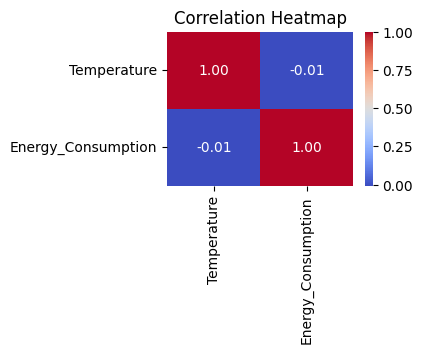

In [6]:
import seaborn as sns

corr_matrix = merged_df[['Temperature', 'Energy_Consumption']].corr()

plt.figure(figsize=(3, 2))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
print(corr_matrix)


The p-value of these variables is smaller than 0.05, therefore, the two variables are
correlated


# Predictive analysis

In [ ]:
from sklearn.linear_model import LogisticRegression

X = merged_df[['Temperature']]
y = merged_df['Energy_Consumption']

# Build simple logistic regression model
model = LogisticRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")
print(f"R score: {model.score(X, y):.4f}")

#plot regression line
plt.figure(figsize=(8, 6))
plt.scatter(X,y, alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Logistic Regression Line : Temp vs Energry Consumed')
plt.xlabel('Temperature')
plt.ylabel('Energy Consumption')
plt.grid()
plt.show()



C:\Users\dmthu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: unsupported format string passed to numpy.ndarray.__format__